In [1]:
#################################################################################
###         
###
##################################################################################

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
  
#----- 
    
Cleanfile = r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\All_Countries.csv"
SelectedVars = "ReductionsByEnergy.csv"
df_Clean = pd.read_csv(Cleanfile)
df_SelectedVars = pd.read_csv(SelectedVars)

ToDelete = df_Clean.loc[(df_Clean["Energy"] == "electric") ]
df_Clean = df_Clean.drop(ToDelete.index)
   
ToDelete = df_Clean.loc[(df_Clean["Energy"] == "hydrogen") ]
df_Clean = df_Clean.drop(ToDelete.index)

#------------------------------------------------------------------------------------
df_Clean = df_Clean.drop("Em_on_target",axis=1)
df_Clean = df_Clean.drop("CO2_Qtls", axis=1)
#------------------------------------------------------------------------------------

Target_Var = "CO2_wltp"
NumVar=10
Alpha=10
Splits=5
V_Country = "ALL_Countries"
model = Ridge(alpha=Alpha)
#Redct_Type  = df_SelectedVars["Reduction_type"].unique()
Redct_Type = "PCA"


C:\Users\mied1\AppData\Local\Temp\ipykernel_1204\431780295.py:30: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Clean = pd.read_csv(Cleanfile)


In [13]:
        
# Cargar el conjunto de datos nuevo en un DataFrame
df_nuevo = pd.read_csv( r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\BE_Cleaned.csv")


 ****************************************** 
 Ridge Regression petrol
 R² score: 0.7682076988005799
 RMSE: 11.711017243999942
 ****************************************** 


C:\Users\mied1\AppData\Local\Temp\ipykernel_1204\514304174.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, pd.DataFrame({'Reduction_type': [Redct_Type], 'TargetVar': [Target_Var], 'R2': [r2], 'Energy': [Ene], 'RMSE': [rmse]})], ignore_index=True)


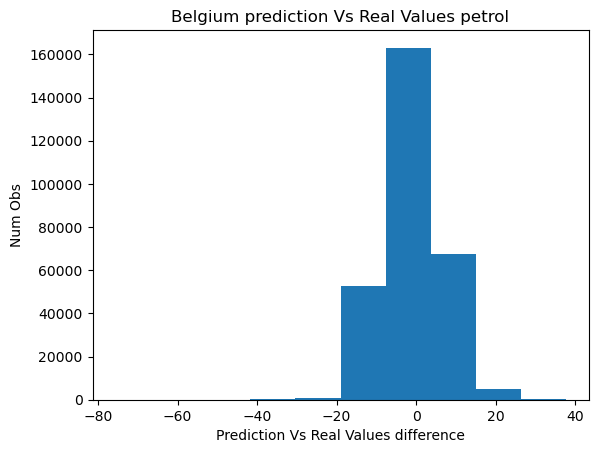

 ****************************************** 
 Ridge Regression diesel
 R² score: 0.8633618044685373
 RMSE: 9.258890370508551
 ****************************************** 


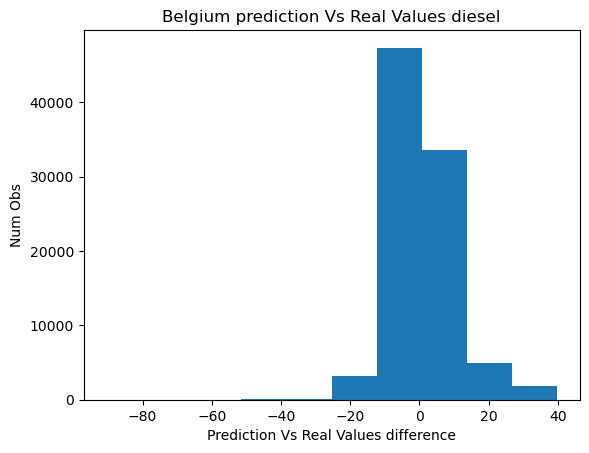

 ****************************************** 
 Ridge Regression lpg
 R² score: 0.835647529922919
 RMSE: 6.815816312108781
 ****************************************** 


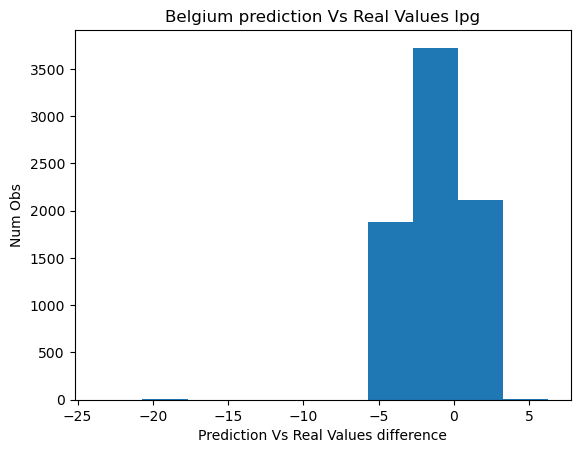

 ****************************************** 
 Ridge Regression hybrid petrol
 R² score: 0.3666227515729842
 RMSE: 12.858116576326589
 ****************************************** 


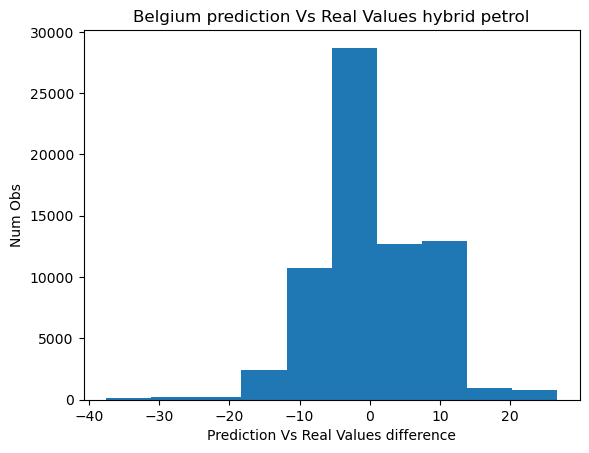

 ****************************************** 
 Ridge Regression hybrid diesel
 R² score: 0.9720484846167354
 RMSE: 2.006457292656469
 ****************************************** 


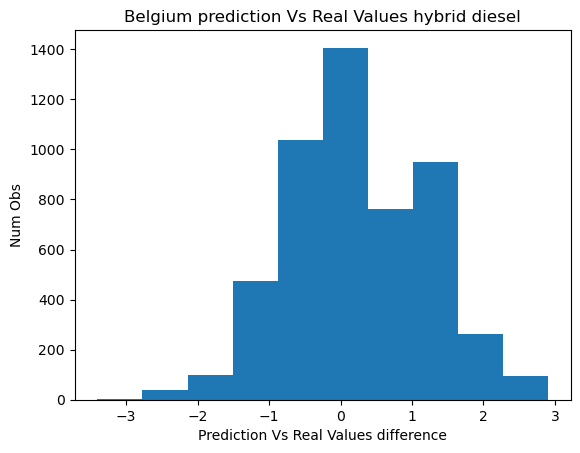

In [16]:
#--   To store results 
result_df = pd.DataFrame(columns=["Reduction_type", "TargetVar", "Energy", "R2","RMSE"])

Energies = df_SelectedVars["Energy"].unique()

df_SelectedVars = df_SelectedVars[df_SelectedVars['Reduction_type'] == Redct_Type]

for Ene in Energies:
    
    df_energy = df_Clean[df_Clean['Energy'] == Ene]    
    df_Prediction = df_nuevo[df_nuevo['Energy'] == Ene]    
    y_target = df_energy[Target_Var]
    
    df_features = df_SelectedVars[(df_SelectedVars['Energy'] == Ene ) & (df_SelectedVars['Reduction_type'] == Redct_Type)]
    
    Top_features  = df_features["Selected_vars"].unique()      
    X_features = df_energy[Top_features].copy() 
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)
     
#    scaler = StandardScaler()    
#    X_scaled = scaler.fit_transform(X_features)   
#    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2)
   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)   

#    results = pd.DataFrame({'Predict': predictions, 'Real values': y_test})
   
    print(" ****************************************** ")
    print(" Ridge Regression "+  Ene )
    r2 = r2_score(y_test, predictions)
    print(" R² score:", r2)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(" RMSE:", rmse)
    print(" ****************************************** ")
    
    result_df = pd.concat([result_df, pd.DataFrame({'Reduction_type': [Redct_Type], 'TargetVar': [Target_Var], 'R2': [r2], 'Energy': [Ene], 'RMSE': [rmse]})], ignore_index=True)
   
    # Utilizar el modelo Ridge ya entrenado para hacer predicciones en el nuevo conjunto de datos
    #y_pred = modelo_ridge.predict(X_nuevo)
    
    df_Pred = df_Prediction[ df_features["Selected_vars"].unique()].copy()    
   
    df_Pred["Predicted_CO2"] = model.predict(df_Pred)
    df_Pred["CO2_wltp"] = df_nuevo["CO2_wltp"]                              
    df_Pred['Variation'] = df_Pred["Predicted_CO2"] - df_Pred['CO2_wltp']

#    df_nuevo["Predicted_CO2"] = model.predict(df_Pred)
    
    plt.hist(df_Pred['Variation'], bins=10)
    plt.xlabel('Prediction Vs Real Values difference')
    plt.ylabel('Num Obs')
    plt.title('Belgium prediction Vs Real Values '+Ene)
    plt.show()


In [4]:
display(result_df.head(25))

,Reduction_type,TargetVar,Energy,R2,RMSE
0,PCA,CO2_wltp,petrol,0.769627,11.689673
1,PCA,CO2_wltp,diesel,0.863207,9.265276
2,PCA,CO2_wltp,lpg,0.835033,6.844931
3,PCA,CO2_wltp,hybrid petrol,0.370845,12.704385
4,PCA,CO2_wltp,hybrid diesel,0.971584,2.002787


In [5]:
display(result_df.head(25))

,Reduction_type,TargetVar,Energy,R2,RMSE
0,PCA,CO2_wltp,petrol,0.769627,11.689673
1,PCA,CO2_wltp,diesel,0.863207,9.265276
2,PCA,CO2_wltp,lpg,0.835033,6.844931
3,PCA,CO2_wltp,hybrid petrol,0.370845,12.704385
4,PCA,CO2_wltp,hybrid diesel,0.971584,2.002787


In [17]:

resultados = df_Pred.drop_duplicates()
display(resultados.head(50))

display(predictions)


,El_Consumpt_whkm,Axle_width_other_mm,Electric range (km),Axle_width_steer_mm,year,Kg_veh,Test_mass,Fuel consumption,Wheelbase_mm,Eco-innovation program,Erwltp (g/km),Power_KW,Predicted_CO2,CO2_wltp,Variation
18949,263.0,1616.0,45.0,1618.0,2022,2115.0,2242.0,1.8,2873.0,0,0.0,143.0,47.851794,47.0,0.851794
18950,261.0,1616.0,45.0,1618.0,2022,2115.0,2236.0,1.8,2873.0,0,0.0,143.0,47.833714,46.0,1.833714
18951,262.0,1616.0,45.0,1618.0,2022,2115.0,2245.0,1.8,2873.0,0,0.0,143.0,47.824905,46.0,1.824905
18952,271.0,1616.0,44.0,1618.0,2022,2115.0,2279.0,1.9,2873.0,0,0.0,143.0,48.642708,50.0,-1.357292
18953,260.0,1616.0,45.0,1618.0,2022,2115.0,2233.0,1.7,2873.0,0,0.0,143.0,47.802299,46.0,1.802299
18960,260.0,1616.0,45.0,1618.0,2022,2135.0,2244.0,1.7,2873.0,0,0.0,143.0,47.556461,46.0,1.556461
18961,260.0,1616.0,45.0,1618.0,2022,2135.0,2258.0,1.7,2873.0,0,0.0,143.0,47.514814,45.0,2.514814
18962,259.0,1616.0,45.0,1618.0,2022,2135.0,2248.0,1.7,2873.0,0,0.0,143.0,47.526597,45.0,2.526597
18963,260.0,1616.0,45.0,1618.0,2022,2135.0,2261.0,1.7,2873.0,0,0.0,143.0,47.505890,46.0,1.505890
18964,260.0,1616.0,45.0,1618.0,2022,2135.0,2256.0,1.7,2873.0,0,0.0,143.0,47.520763,46.0,1.520763


array([53.30551399, 35.76887102, 36.44471122, ..., 36.46223611,
       28.71550315, 49.05149617])

In [12]:
display(df_nuevo.head(25))

,Country,Constructor,Veh_type,Version,Brand,Veh_Model,Veh_Category,Kg_veh,Test_mass,CO2_wltp,...,El_Consumpt_whkm,Erwltp (g/km),year,Fuel consumption,Electric range (km),Eco-innovation program,Em_on_target,CO2_wltp_quartiles,CO2_Qtls,Predicted_CO2
0,PT,HYUNDAI MOTOR EUROPE,OS,D81E13Y2,HYUNDAI,KAUAI N,M1,1585.0,1720.0,194.0,...,0.0,0.87,2022,8.5,0.0,1,0,"(135.0, 373.0]",4,389.836962
1,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
2,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
3,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
4,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
5,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
6,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
7,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
8,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118
9,PT,HYUNDAI MOTOR EUROPE,OS,D61CZ1Y1,HYUNDAI,KAUAI,M1,1451.0,1558.0,114.0,...,0.0,0.00,2022,5.0,0.0,0,0,"(101.0, 123.0]",2,-233.951118


In [8]:
df_Pred.mean

<bound method DataFrame.mean of         El_Consumpt_whkm  Axle_width_other_mm  Electric range (km)  \
0                    0.0               1579.0                  0.0   
1                    0.0               1589.0                  0.0   
2                    0.0               1589.0                  0.0   
3                    0.0               1589.0                  0.0   
4                    0.0               1589.0                  0.0   
...                  ...                  ...                  ...   
509556               0.0               1480.0                  0.0   
509557             279.0               1631.0                350.0   
509558             176.0               1558.0                 71.0   
509559               0.0               1562.0                  0.0   
509560               0.0               1420.0                  0.0   

        Axle_width_steer_mm  year  Kg_veh  Test_mass  Fuel consumption  \
0                    1582.0  2022  1585.0     1720.0 

In [9]:
#df_nuevo[VarName] = df_Pred[VarName]

df_nuevo["Predicted_CO2"] = df_Pred["Predicted_CO2"]




df_nuevo.groupby("Energy").agg({"CO2_wltp": ["min", "max", "mean"], "Predicted_CO2": ["min", "max", "mean"]})

CO2_wltp                    Predicted_CO2               \
                   min    max        mean           min          max   
Energy                                                                 
diesel           106.0  322.0  136.108620   -710.084404   721.080899   
electric           0.0    0.0    0.000000   -886.661610  4059.265357   
hybrid diesel     18.0   56.0   35.232871     16.234244    54.508902   
hybrid petrol     12.0   94.0   32.770607   -384.178703  1576.396598   
lpg              108.0  182.0  118.109215   -442.275972   -39.968268   
petrol            87.0  373.0  131.470247   -471.262402  1941.829432   

                           
                     mean  
Energy                     
diesel        -147.281783  
electric        76.606102  
hybrid diesel   35.478790  
hybrid petrol  -12.619875  
lpg           -341.310224  
petrol        -223.227789

In [10]:
import winsound
winsound.PlaySound("C:\\Users\\mied1\\00 - Herramientas Python\\mixkit-intro-transition-1146.wav", winsound.SND_FILENAME)
 
display ("\n End")


'\n End'

# 